<a href="https://colab.research.google.com/github/JeongJeong-code/P6_market_place/blob/main/text_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Sommaire


* [Importation des données et paramètrage](#chapter1)
* [Traitement des données textuelles](#chapter2)
* [Traitement des données visuelles](#chapter3)
* [Classification et Clusterisation](#chapter4)



#Importation et paramètrage <a class="anchor" id="chapter1"></a>

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from google.colab import files
import pandas as pd
import seaborn as sns
import os.path
import missingno as mi
import re
import sklearn as sk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import KernelPCA
from sklearn.cluster import (AgglomerativeClustering,
                             KMeans, DBSCAN, SpectralClustering)
from sklearn.metrics import davies_bouldin_score, silhouette_score
! {sys.executable} -m pip install ipynb
!pip install  opencv-python==3.4.2.17
!pip install  opencv-contrib-python==3.4.2.17
import cv2 as cv
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem as stem
import string

from google.colab import drive
import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import preprocessing

from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 25.0 MB 8.8 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 30.6 MB 133 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
!python --version

Python 3.7.12


In [ ]:

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
url = 'https://raw.githubusercontent.com/JeongJeong-code/P6_market_place/main/df_cat_prime.csv'
df1_test= pd.read_csv(url)
print(len(df1_test))
df1_test =df1_test[df1_test['image'] !='9743e6d1c9f3180483825fe4d2e97836.jpg']
print(len(df1_test))
df1_test.reset_index(inplace=True,drop=True)

1049
1048


In [ ]:
df1_test.iloc[343]

Unnamed: 0                                                              344
product_name                   Anna Andre Paris Majesty Deodorant Combo Set
image                                  6e44d107ee32412243b19b0ed9b415f3.jpg
product_specifications    {"product_specification"=>[{"key"=>"Number of ...
categories                                         beauty and personal care
description               flipkart anna andre paris majesty deodorant co...
Name: 343, dtype: object

In [ ]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              1048 non-null   int64 
 1   product_name            1048 non-null   object
 2   image                   1048 non-null   object
 3   product_specifications  1048 non-null   object
 4   categories              1048 non-null   object
 5   description             1048 non-null   object
dtypes: int64(1), object(5)
memory usage: 49.2+ KB


#Traitement des données textuelles <a class="anchor" id="chapter2"></a>

In [ ]:
lemma = 1

stemmer = stem.PorterStemmer()
lemmatizer = stem.WordNetLemmatizer()
for i in range(len(df1_test)):
    df1_test.description[i] = nltk.word_tokenize(df1_test.description[i])
    if lemma == 1:
        df1_test.description[i] = [lemmatizer.lemmatize(t) for t in
                                   df1_test.description[i]]
    else :
        df1_test.description[i] = [stemmer.stem(t) for t in
                                   df1_test.description[i]]
    df1_test.description[i] = " ".join(df1_test.description[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/di

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
tokenize_desc = pd.Series(df1_test.description.str.lower(
                          ).apply(tokenizer.tokenize), name='tokenize_desc')

In [ ]:
all_words = [word for tokens in tokenize_desc for word in tokens]
count_all_words = Counter(all_words)
most_common_words = [word for word,
                     word_count in count_all_words.most_common(20)]

In [ ]:
words = ', '.join(all_words)

In [ ]:
pd.Series(words).value_counts()

feature, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, height, pack, price, this, curtain, enhances, look, interior, this, curtain, made, from, high, quality, polyester, fabric, feature, eyelet, style, stitch, with, metal, ring, make, room, environment, romantic, loving, this, curtain, wrinkle, anti, shrinkage, have, elegant, apparance, give, your, home, bright, modernistic, appeal, with, these, design, surreal, attention, sure, steal, heart, these, contemporary, eyelet, valance, curtain, slide, smoothly, when, draw, them, apart, first, thing, morning, welcome, bright, ray, want, wish, good, morning, whole, world, when, draw, them, close, evening, create, most, special, moment, joyous, beauty, given, soothing, print, bring, home, elegant, curtain, that, softly, filter, light, your, room, that, right, amount, sunlight, specification, elegance, polyester, multicolor, abstract, eyelet, d

In [ ]:
pd.Series(all_words).value_counts()

only           888
product        863
with           842
your           655
free           617
              ... 
enriched         1
jegging          1
bed              1
introducing      1
literider        1
Length: 4273, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

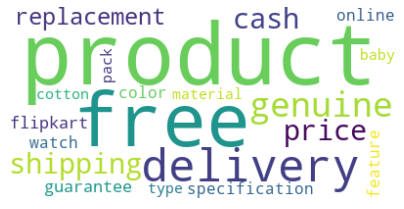

In [ ]:

wc = WordCloud(background_color="white", mode="RGBA", max_words=20,
               collocations=False).generate(words)
plt.figure(figsize=[7, 7])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [ ]:
stopword_list = nltk.corpus.stopwords.words('english') + most_common_words

(-0.5, 399.5, 199.5, -0.5)

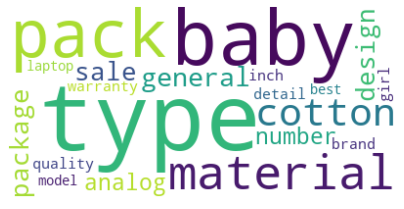

In [ ]:
wc_stop = WordCloud(background_color="white", mode="RGBA", max_words=20,
                    collocations=False,
                    stopwords=stopword_list).generate(words)
plt.figure(figsize=[7, 7])
plt.imshow(wc_stop, interpolation="bilinear")
plt.axis("off")

In [ ]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(df1_test.categories), name='class_labels')

In [ ]:
list_labels = y
list_tokens = tokenize_desc

In [ ]:
list_tokens

0       [feature, elegance, polyester, multicolor, abs...
1       [specification, sathiyas, cotton, bath, towel,...
2       [feature, eurospa, cotton, terry, face, towel,...
3       [feature, santosh, royal, fashion, cotton, pri...
4       [feature, jaipur, print, cotton, floral, king,...
                              ...                        
1043    [oren, empower, extra, large, self, adhesive, ...
1044    [wallmantra, large, vinyl, sticker, sticker, p...
1045    [uberlyfe, extra, large, pigmented, polyvinyl,...
1046    [wallmantra, medium, vinyl, sticker, sticker, ...
1047    [uberlyfe, large, vinyl, sticker, online, uber...
Name: tokenize_desc, Length: 1048, dtype: object

In [ ]:
X_train = df1_test.description
y_train = y

In [ ]:
count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+',
                                   stop_words=stopword_list)
bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
X_train_word = count_vectorizer.fit_transform(X_train)

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


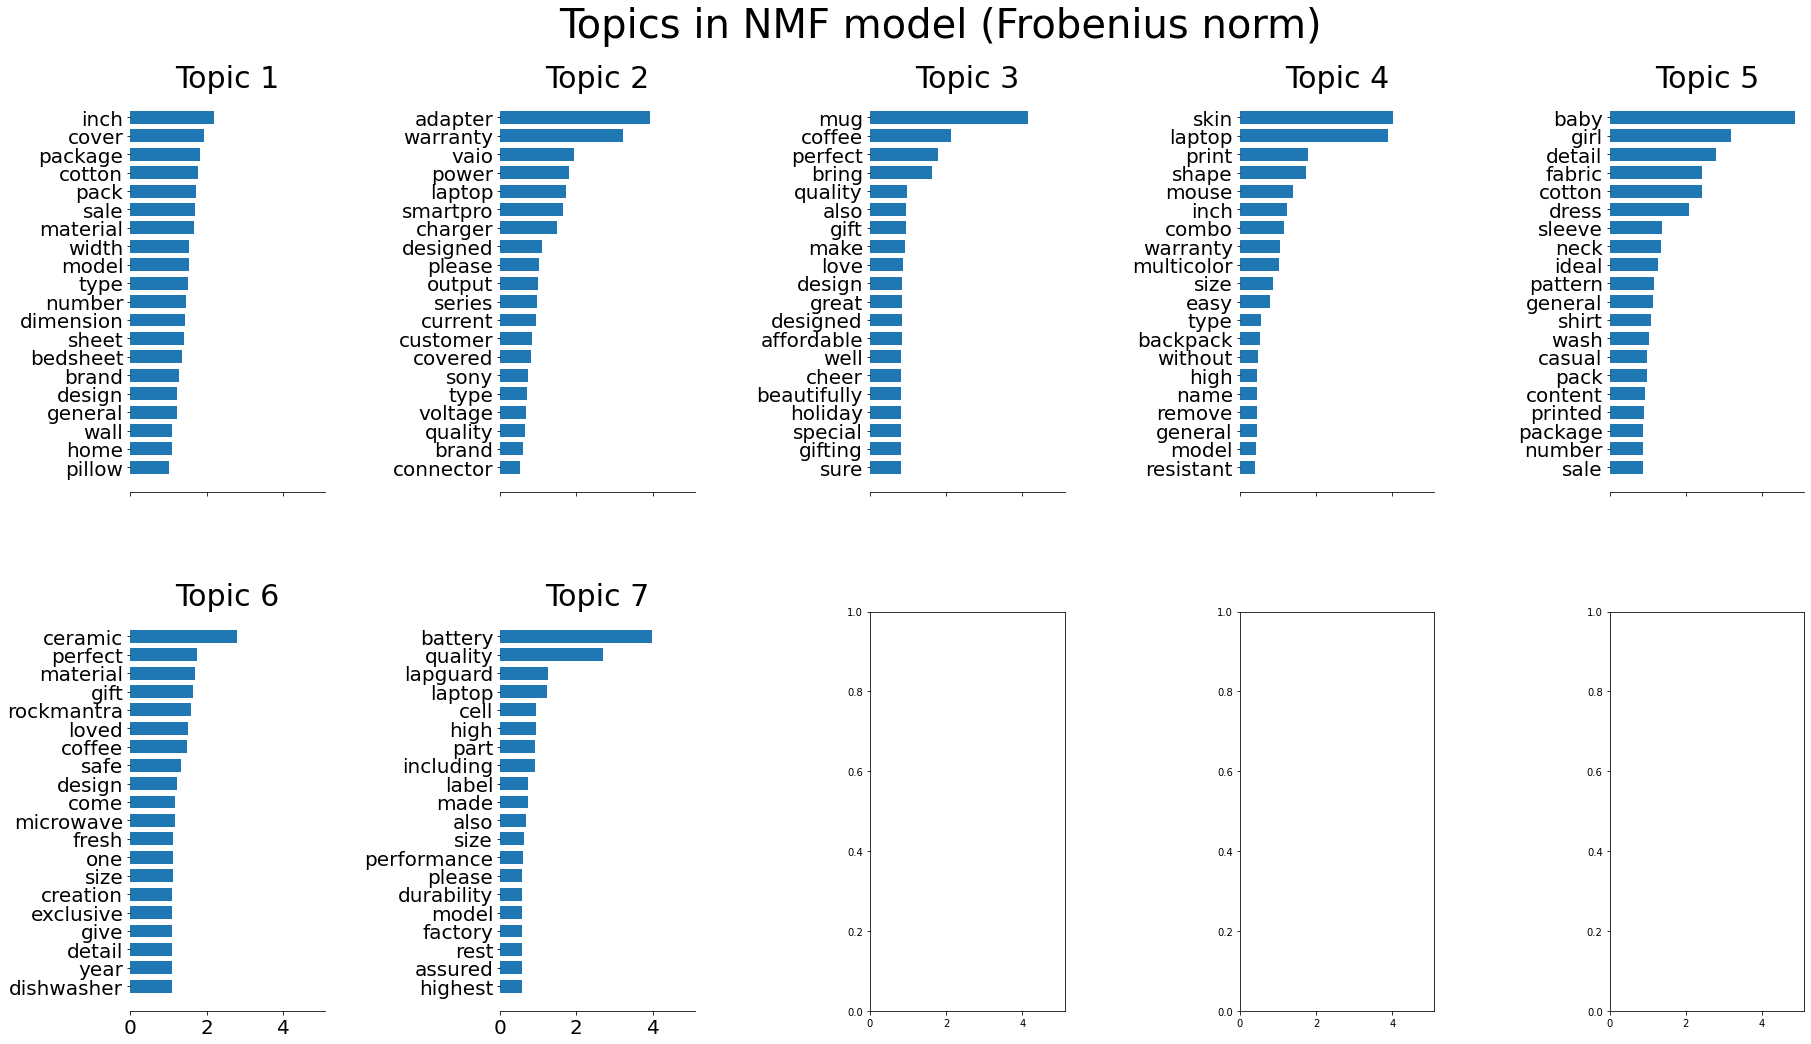

In [ ]:
n_components = 7
n_top_words = 20
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1,
          l1_ratio=0.5).fit(X_train_word)
tfidf_feature_names = count_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words,
    "Topics in NMF model (Frobenius norm)")

#Traitement des données visuelles <a class="anchor" id="chapter3"></a>

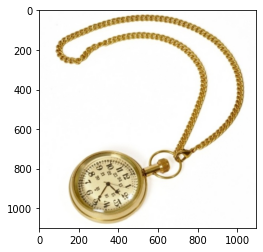

(<matplotlib.image.AxesImage at 0x7efc3ff6c590>, None)

In [ ]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()
name = '9833d0de7f7e1927c807411c10b19189'
img = cv.imread(img_path + '/' + name+'.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img), plt.show()

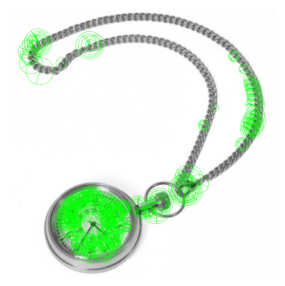

(<matplotlib.image.AxesImage at 0x7efc40662210>, None)

In [ ]:
img = cv.imread(img_path + '/' + name + '.jpg', cv.IMREAD_GRAYSCALE)
orb = cv.ORB_create()
kp, des = orb.detectAndCompute(img, None)
img2 = cv.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=4)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img2), plt.show()

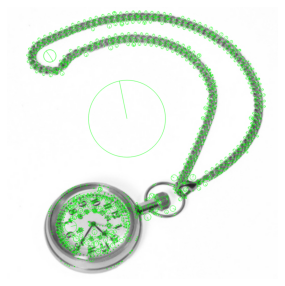

(<matplotlib.image.AxesImage at 0x7efc40720350>, None)

In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img, None)
img3 = cv.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=4)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img3), plt.show()

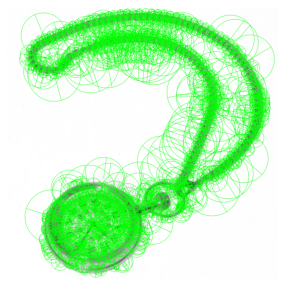

(<matplotlib.image.AxesImage at 0x7efc3ffcae90>, None)

In [ ]:
surf = cv.xfeatures2d.SURF_create()
kp, des = surf.detectAndCompute(img, None)
img4 = cv.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=4)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img4), plt.show()

In [ ]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()
dico = []
prob = []
for leaf in train.image:
    img = cv.imread(img_path + '/' + str(leaf), cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create()
    kp = orb.detect(img, None)
    kp, des = orb.compute(img, kp)
    if len(kp) == 0:
        prob.append(leaf)
        des = []
    for d in des:
        dico.append(d)

In [ ]:
k = np.size(labels) * 10
batch_size = np.size(os.listdir(img_path)) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size,
                         verbose=1).fit(dico)

Init 1/3 with method k-means++
Inertia for init 1/3: 1382254629.0
Init 2/3 with method k-means++
Inertia for init 2/3: 1397385311.0
Init 3/3 with method k-means++
Inertia for init 3/3: 1403468722.0
Minibatch step 1/15982: mean batch inertia: 146751.15238095238
Minibatch step 2/15982: mean batch inertia: 111771.23095789686, ewa inertia: 111771.23095789686
Minibatch step 3/15982: mean batch inertia: 110330.66721264619, ewa inertia: 111753.20391680351
Minibatch step 4/15982: mean batch inertia: 108561.75390562712, ewa inertia: 111713.26649599272
Minibatch step 5/15982: mean batch inertia: 108489.85032839124, ewa inertia: 111672.92905455294
Minibatch step 6/15982: mean batch inertia: 108248.9366556434, ewa inertia: 111630.08162632772
Minibatch step 7/15982: mean batch inertia: 108517.91695093848, ewa inertia: 111591.13637265361
Minibatch step 8/15982: mean batch inertia: 107831.10875684049, ewa inertia: 111544.08384022255
Minibatch step 9/15982: mean batch inertia: 107805.62819569925, ewa 

In [ ]:
kmeans.verbose = False
histo_list = []
for leaf in train.image:
    img = cv.imread(img_path + '/' + str(leaf) )
    kp, des = orb.detectAndCompute(img, None)
    histo = np.zeros(k)
    nkp = np.size(kp)
    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly
    histo_list.append(histo)

In [ ]:
X_train_word_df = pd.DataFrame.sparse.from_spmatrix(X_train_word)
X_train_image = pd.DataFrame(histo_list)
X = pd.concat([X_train_word_df, X_train_image], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


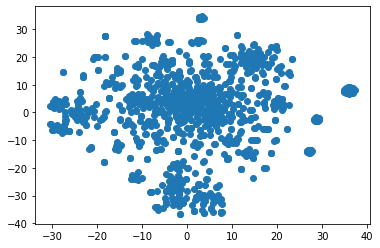

In [ ]:
tsne_2d = TSNE(n_components=2, perplexity=50)
X_tsne = tsne_2d.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [ ]:
lr = LogisticRegression()
svc = SVC()
gb = GaussianNB()
nb = MultinomialNB()
cross_val_score(gb, X_, y_train, cv=5, scoring='accuracy', error_score='raise')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

array([0.8047619 , 0.86190476, 0.86666667, 0.76076555, 0.68899522])

In [ ]:
cross_val_score(lr, X, y_train, cv=5, scoring='accuracy', error_score='raise')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

array([0.93809524, 0.97619048, 0.9       , 0.72727273, 0.72248804])

In [ ]:
cross_val_score(svc, X, y_train, cv=5, scoring='accuracy', error_score='raise')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

array([0.77142857, 0.82857143, 0.80952381, 0.61244019, 0.58373206])

In [ ]:
labels_ = gb.fit(X_tsne, y_train).predict(X_tsne)
gb_labels = pd.Series(labels_)

In [ ]:
df1_test.categories.nunique()

7

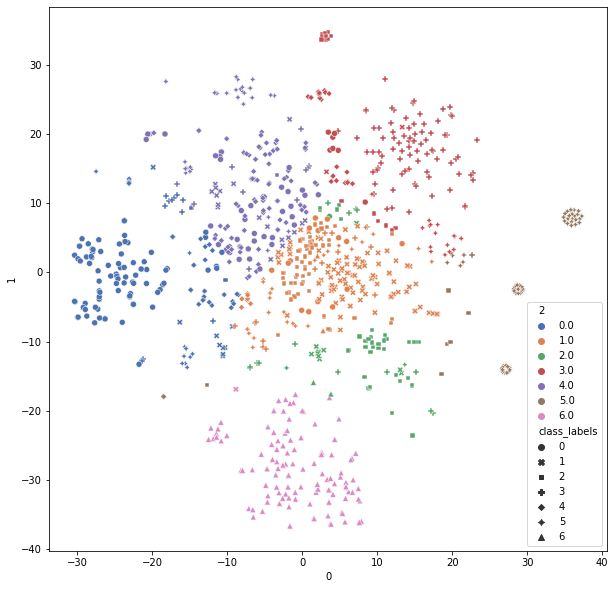

In [ ]:
results = np.c_[X_tsne, labels_]
pd_result = pd.DataFrame(results)
pd_result = pd.concat([pd_result, pd.Series(y_train)], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x=pd_result[0], y=pd_result[1], hue=pd_result[2],
                style=pd_result.class_labels, palette='deep')

In [ ]:
pd.crosstab(pd_result[2], pd_result.class_labels)

class_labels,0,1,2,3,4,5,6
2,,,,,,,
0.0,88,12,5,12,30,12,0
1.0,16,105,67,15,7,28,2
2.0,1,10,47,17,0,6,2
3.0,8,2,16,94,20,18,0
4.0,37,18,1,10,90,36,0
5.0,0,0,13,1,3,50,0
6.0,0,3,0,0,0,0,146


In [ ]:
pd.crosstab(y_train, gb_labels)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,88,16,1,8,37,0,0
1,12,105,10,2,18,0,3
2,5,67,47,16,1,13,0
3,12,15,17,94,10,1,0
4,30,7,0,20,90,3,0
5,12,28,6,18,36,50,0
6,0,2,2,0,0,0,146


In [ ]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+',
                                   stop_words=stopword_list)
tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(*bow["train"])
cross_val_score(nb_classifier, *bow["train"], cv=5, scoring='accuracy')

array([0.87619048, 0.95714286, 0.90952381, 0.74162679, 0.77511962])

In [ ]:
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(*tfidf["train"])
cross_val_score(nb_classifier_tfidf, *tfidf["train"], cv=5, scoring='accuracy')

array([0.92857143, 0.97142857, 0.91428571, 0.72727273, 0.80382775])

#Classification et Clusterisation <a class="anchor" id="chapter4"></a>


In [ ]:
kmeans = KMeans()
gb = GaussianNB()

In [ ]:
X_pca = KernelPCA(n_components=2).fit_transform(X)
kmeans_pca = KMeans(n_clusters=df1_test.categories.nunique()).fit(X_pca)
pd.crosstab(index=y_train, columns=kmeans_pca.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,43,58,0,0,21,28,0
1,130,0,1,0,19,0,0
2,99,0,23,6,21,0,0
3,105,9,2,0,33,0,0
4,91,24,0,0,29,6,0
5,109,0,0,0,30,0,11
6,144,0,0,0,6,0,0


In [ ]:
X_spca = SparsePCA(n_components=2).fit_transform(X)
kmeans_spca = KMeans(n_clusters=df1_test.categories.nunique()).fit(X_spca)
pd.crosstab(index=y_train, columns=kmeans_spca.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,40,0,51,35,0,0,24
1,126,0,0,0,0,2,22
2,101,7,0,0,6,16,19
3,107,0,1,0,0,2,39
4,90,0,16,6,0,0,38
5,114,0,0,0,0,0,36
6,140,0,0,0,0,0,10


Kmeans texte et images

In [ ]:
kmeans = KMeans(n_clusters=df1_test.categories.nunique()).fit(X_tsne)

In [ ]:
pd.crosstab(index=y_train, columns=kmeans.labels_)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,40,83,0,1,8,16,2
1,69,9,3,0,2,11,56
2,67,2,0,5,17,3,55
3,20,4,2,4,96,13,10
4,46,21,0,0,26,57,0
5,29,10,0,69,1,34,7
6,1,0,145,0,0,0,4


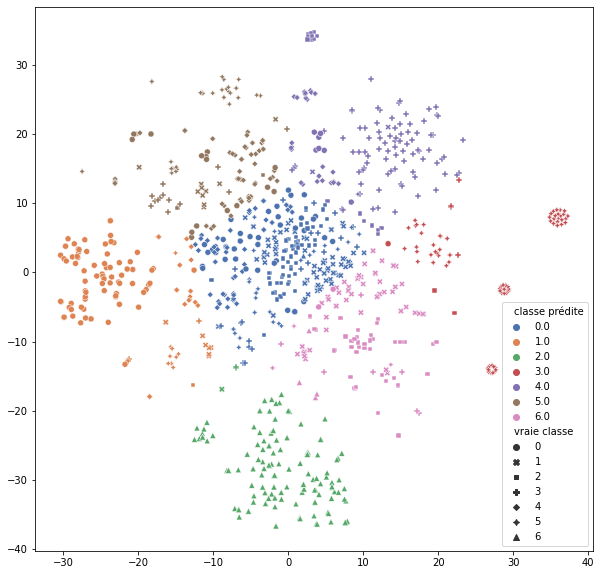

In [ ]:
results_kmeans = np.c_[X_tsne, kmeans.labels_]
pd_result_kmeans = pd.DataFrame(results_kmeans)
pd_result_kmeans = pd.concat([pd_result_kmeans, pd.Series(y_train)], axis=1)
pd_result_kmeans.rename(columns={2:'classe prédite',
                                 'class_labels':'vraie classe'}, inplace = True)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1],
                hue=pd_result_kmeans['classe prédite'],
                style=pd_result_kmeans['vraie classe'], palette ='deep')

In [ ]:
display(metrics.fowlkes_mallows_score(pd_result_kmeans['vraie classe'],
                                      pd_result_kmeans['classe prédite']))
display(metrics.homogeneity_completeness_v_measure(
        pd_result_kmeans['vraie classe'],
        pd_result_kmeans['classe prédite']))

0.41016103038842977

(0.4072034964123231, 0.4202989092563844, 0.4136475838983956)

Gaussian naive bayes texte et image

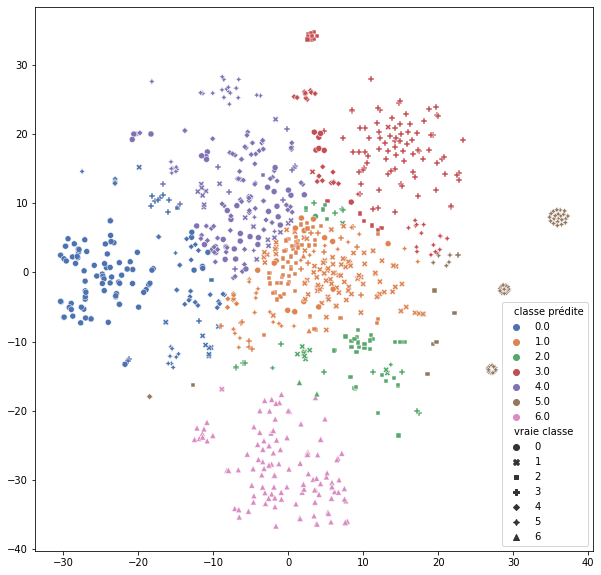

In [ ]:
gb_class = gb.fit(X_tsne,y_train).predict(X_tsne)
results_gb = np.c_[X_tsne, gb_class]
pd_result_gb = pd.DataFrame(results_gb)
pd_result_gb = pd.concat([pd_result_gb, pd.Series(y_train)], axis=1)
pd_result_gb.rename(columns={2:'classe prédite',
                                 'class_labels':'vraie classe'}, inplace = True)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1],
                hue=pd_result_gb['classe prédite'],
                style=pd_result_gb['vraie classe'], palette ='deep')

In [ ]:
pd.crosstab(index=y_train, columns=gb_class)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,88,16,1,8,37,0,0
1,12,105,10,2,18,0,3
2,5,67,47,16,1,13,0
3,12,15,17,94,10,1,0
4,30,7,0,20,90,3,0
5,12,28,6,18,36,50,0
6,0,2,2,0,0,0,146


In [ ]:
gb  = GaussianNB()
cross_val_score(gb, X_tsne,y_train, cv=5, scoring='accuracy')

array([0.53809524, 0.68095238, 0.71904762, 0.47368421, 0.41626794])

Gaussian naive Bayes Texte

In [ ]:
gb  = GaussianNB()
cross_val_score(gb, X_tsne_words,y_train, cv=5, scoring='accuracy')

array([0.6047619 , 0.73809524, 0.78571429, 0.53588517, 0.61244019])

In [ ]:
gb_words  = GaussianNB().fit(X_tsne_words,y_train).predict(X_tsne_words)

In [ ]:
pd.crosstab(index=y_train, columns=gb_words)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,100,11,4,14,21,0,0
1,4,95,36,9,3,3,0
2,0,70,72,3,1,3,0
3,6,15,8,113,5,2,0
4,31,2,0,4,110,3,0
5,8,14,19,38,4,67,0
6,0,1,1,0,0,0,148


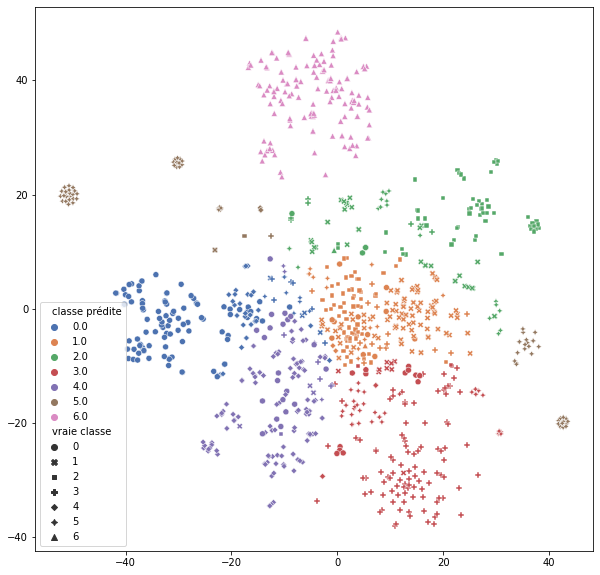

In [ ]:
results_gb_words = np.c_[X_tsne_words, gb_words]
pd_result_gb_words = pd.DataFrame(results_gb_words)
pd_result_gb_words = pd.concat([pd_result_gb_words, pd.Series(y_train)], axis=1)
pd_result_gb_words.rename(columns={2:'classe prédite',
                                 'class_labels':'vraie classe'}, inplace = True)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne_words[:,0],y=X_tsne_words[:,1],
                hue=pd_result_gb_words['classe prédite'],
                style=pd_result_gb_words['vraie classe'], palette ='deep')

Kmeans Texte

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


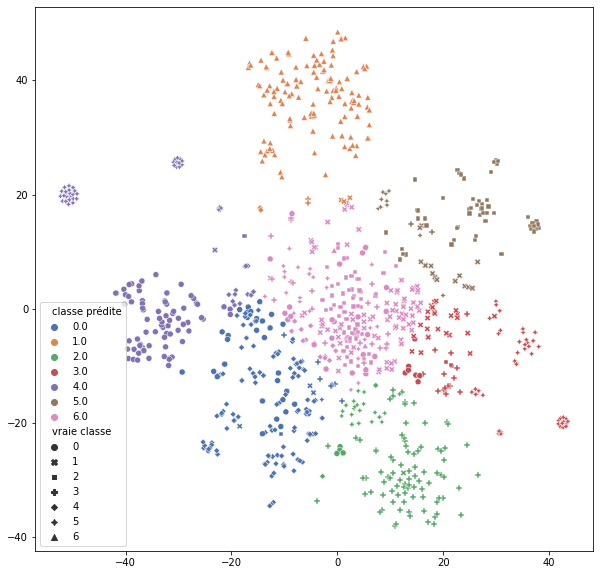

In [ ]:
X_tsne_words = TSNE(n_components=2).fit_transform(X_train_word)
kmeans_words = KMeans(n_clusters=df1_test.categories.nunique()).fit(X_tsne_words)
results_kmeans_words = np.c_[X_tsne_words, kmeans_words.labels_]
pd_result_kmeans_words = pd.DataFrame(results_kmeans_words)
pd_result_kmeans_words = pd.concat([pd_result_kmeans_words, pd.Series(y_train)], axis=1)
pd_result_kmeans_words.rename(columns={2:'classe prédite',
                                 'class_labels':'vraie classe'}, inplace = True)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne_words[:,0],y=X_tsne_words[:,1],
                hue=pd_result_kmeans_words['classe prédite'],
                style=pd_result_kmeans_words['vraie classe'], palette ='deep')

In [ ]:
pd.crosstab(index=y_train,columns=pd_result_kmeans_words['classe prédite'])

classe prédite,0.0,1.0,2.0,3.0,4.0,5.0,6.0
class_labels,,,,,,,
0,32,0,4,8,82,0,24
1,3,3,1,30,3,20,90
2,1,0,0,3,3,69,73
3,7,3,100,14,0,2,23
4,118,3,4,0,13,0,12
5,1,0,24,48,37,11,29
6,0,148,0,0,0,0,2


In [ ]:
display(metrics.fowlkes_mallows_score(pd_result_kmeans_words['vraie classe'],
                                      pd_result_kmeans_words['classe prédite']))
display(metrics.homogeneity_completeness_v_measure(
        pd_result_kmeans_words['vraie classe'],
        pd_result_kmeans_words['classe prédite']))

0.4834484565993248

(0.4829294281306131, 0.4946493180089804, 0.4887191199984695)

Kmeans images


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


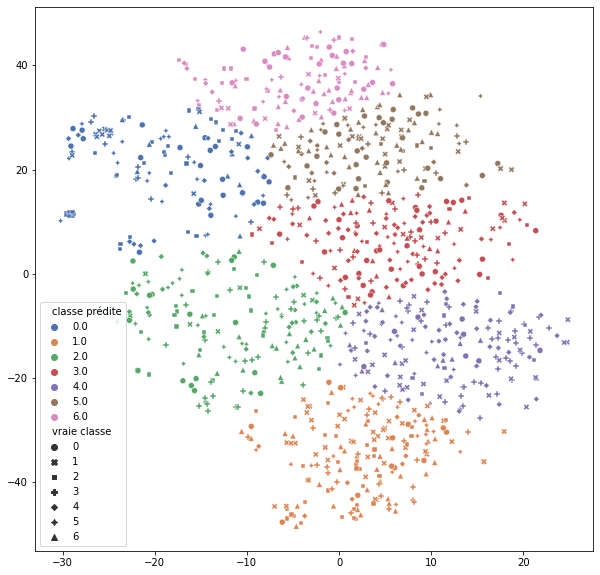

In [ ]:
X_tsne_image = TSNE(n_components=2).fit_transform(X_train_image)
kmeans_image = KMeans(n_clusters=df1_test.categories.nunique()).fit(
                      X_tsne_image)
results_kmeans_image = np.c_[X_tsne_image, kmeans_image.labels_]
pd_result_kmeans_image = pd.DataFrame(results_kmeans_image)
pd_result_kmeans_image = pd.concat([pd_result_kmeans_image, pd.Series(y_train)],
                                   axis=1)
pd_result_kmeans_image.rename(columns={2:'classe prédite',
                                 'class_labels':'vraie classe'}, inplace = True)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne_image[:,0],y=X_tsne_image[:,1],
                hue=pd_result_kmeans_image['classe prédite'],
                style=pd_result_kmeans_image['vraie classe'], palette ='deep')

In [ ]:
display(metrics.fowlkes_mallows_score(pd_result_kmeans_image['vraie classe'],
                                      pd_result_kmeans_image['classe prédite']))
display(metrics.homogeneity_completeness_v_measure(
        pd_result_kmeans_image['vraie classe'],
        pd_result_kmeans_image['classe prédite']))

0.1721909413021551

(0.06152528392634136, 0.06186694909430106, 0.06169564348586845)